<a href="https://colab.research.google.com/github/LuizVaccaro/Projetos-Data-Science/blob/main/Analisando_os_Dados_do_Airbnb_(Hawaii)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Hawaii*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes as ilhas do Hawaii, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/hi/hawaii/2022-09-12/visualisations/listings.csv", index_col = 'id') 

## Análise dos Dados


**Dicionário das variáveis**

* Id --> ID do anúncio
* Name --> Nome do anúncio  
* Host_id --> ID do usuário, identificação númerica do usuário
* Host_name --> Nome do anfitrião
* Neighbourhood_group --> Nesta análise refere-se a ilha onde se encontra a propriedade
* Neighbourhood --> Bairro
* Latitude --> Cordenada de latitude da propriedade
* Longitude --> Cordenada de longitude da propriedade
* Room_type --> Tipo de acomodação 
* Price --> Preço de aluguel do local
* Minimum_nights --> Quantidade miníma de noites
* Number_of_reviews --> Número de avaliações do anúncio
* Reviews_per_month -- > Número de avaliações por mês
* Last_review --> Data da última avaliação
* Calculated_host_listings_count --> Quantidade de imóveis do mesmo anfitrião
* License --> Licenças 
* Availability_365 --> Número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,149,5,24,2022-07-13,0.17,3,212,10,119-269-5808-01R
34843927,Simply Paradise Glamping,262664392,Adriano And Julia,Hawaii,North Kona,19.66220,-155.95681,Private room,83,1,194,2022-08-25,5.90,3,334,96,NaN
35066424,Spacious 3 Bedroom 3 Bath + Loft at Alii Cove,264152810,Robyn,Hawaii,North Kona,19.62768,-155.98543,Entire home/apt,175,30,2,2022-02-19,0.25,1,197,2,NaN
35067513,"Noah’s Hideaway Maui, Luxury B&B, Walk to Beach!",264162605,Fadi,Maui,Lahaina,20.91764,-156.68840,Entire home/apt,622,1,70,2022-06-24,1.80,2,191,5,"440090330000, TA-197-216-9216-01"
5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43081,-155.88069,Entire home/apt,91,5,201,2022-09-03,1.31,3,166,19,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print ('\033[1m''Volume Dataset:''\033[0m')
print ("Variáveis:" , df.shape[1])
print ('Entradas:', df.shape[0])

# verificar as 5 primeiras entradas do dataset
print ('\033[1m', 'Identificando o Tipo de Cada Coluna:', '\033[0m')
display(df.dtypes)

Volume Dataset:
Variáveis: 17
Entradas: 28580
 Identificando o Tipo de Cada Coluna: 


name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False)

reviews_per_month                 19.380686
last_review                       19.380686
license                           16.462561
host_name                          0.468859
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
name                               0.000000
host_id                            0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
price                              0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

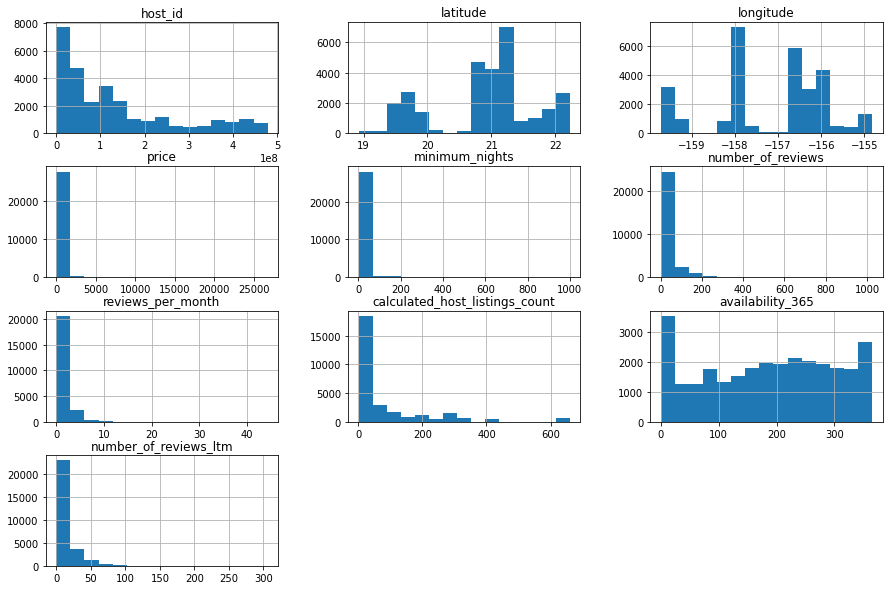

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Verificação de possíveis outliers nas dados do *price e *minimum_nights pois o histograma nos mostra uma variação muito grande de valores, assim podendo impactar os dados da análise. Na tabela abaixo podemos analisar melhor estas variações.

In [ ]:
df[['price', 'minimum_nights', 'reviews_per_month', 'number_of_reviews']].describe()

,price,minimum_nights,reviews_per_month,number_of_reviews
count,28580.000000,28580.000000,23041.000000,28580.000000
mean,476.107558,8.595311,1.271445,32.411127
std,1304.712077,25.744771,1.391117,59.443697
min,0.000000,1.000000,0.010000,0.000000
25%,167.000000,1.000000,0.310000,1.000000
50%,266.000000,3.000000,0.810000,9.000000
75%,432.000000,5.000000,1.810000,36.000000
max,26774.000000,1000.000000,44.350000,1025.000000


#### **Boxplot do price e minimum_nights para verificação de outliers**

De acordo com uma pesquisa feita no site do próprio Airbnb ficou constatado que a grande maioria das locações nas 3 ilhas fica abaixo do valor de 5000. Normalmente os locais que ultrapassam o valor estipulado nesta análise são representadas por propriedades de luxos que na maioria das vezes são utilizadas por um número maior de pessoas. Na pesquisa foram utilizadas 3 noites, conforme 50% dos dados que pode ser visto na tabela anterior e hospedagem para 2 adultos. 
 
Podemos verificar a confirmação desta informação com o Bloxplot a seguir, onde demonstra que entradas acima de 5000, representam menos de 1% dos dados. 

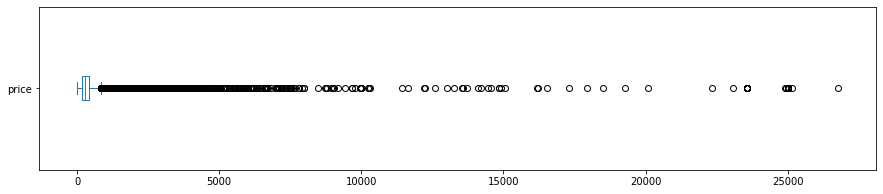

Price: Acima de 5000
190 Número de entradas
0.6648%


In [ ]:
df.price.plot(kind='box', vert = False, figsize=(15,3))
plt.show()

print('Price: Acima de 5000')
print("{} Número de entradas".format(len(df[df.price > 5000])))
print("{:.4f}%".format(len(df[df.price > 5000])/ df.shape[0]*100))

Constatei que no site do Airbnb há uma diferença de resultados de propriedades dependendo da forma como é pesquisado, quando você pesquisa de 1 a 28 dias temos a locação e valores calculados como noite. Mas feita uma pesquisa de por exemplo do dia 1º a 29º dia a cobrança é alterada para aluguel mensal, fazendo assim ocorrer uma mudança substancial nas imóveis disponíveis. 
 
Podemos compreender um pouco deste cenário pelo seguinte fato, o Hawai é um local onde anualmente há temporadas de surf combinada com a temporada de férias, fazendo assim aumentar a circulação de turista, por conta disso, é comum em determinadas épocas do ano aumentar a quantidade de aluguel voltados locação a mensal (temporada). Normalmente é uma característica vista em uma parte dos litorais brasileiros, onde as pessoas buscam o aluguel por temporada.  
 
Se analisar no gráfico a seguir, é possível notar a diferença de mais de 6% na quantidade de imóveis disponíveis de 28 para 30 dias. Grande parte dos anunciantes focam em aluguéis por noite, mas há um considerável número de imóveis que buscam o aluguel mensal ou até com prazo de dias maiores.


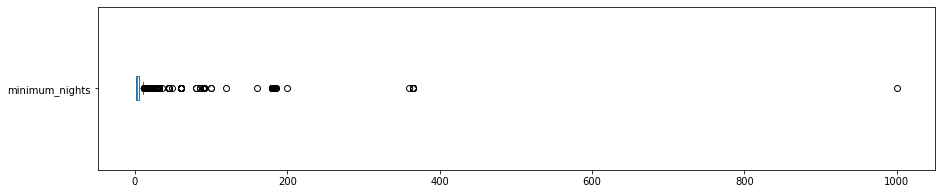

Noites minimas 28 dias = preço diário
minimum_nights acima de: 28
2758 Número de entradas
9.6501%
Noites minimas 30 dias = preço mensal
minimum_nights acima de: 30
799 Número de entradas
2.7957%


In [ ]:

df.minimum_nights.plot(kind='box', vert = False, figsize=(15,3))
plt.show()

print('\033[1m' 'Noites minimas 28 dias = preço diário' '\033[0m')
print('minimum_nights acima de: 28')
print("{} Número de entradas".format(len(df[df.minimum_nights > 28])))
print("{:.4f}%".format(len(df[df.minimum_nights > 28])/ df.shape[0]*100))

print('\033[1m'"Noites minimas 30 dias = preço mensal"'\033[0m')
print('minimum_nights acima de: 30')
print("{} Número de entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format(len(df[df.minimum_nights > 30])/ df.shape[0]*100))

####**Boxplot removendo os Outliers**


Neste novo histograma, após a remoção dos outliers, podemos verificar que os preços ficaram mais condizentes com a realidade do local.
 
Quanto a análise dos dados da coluna minimum_nights, fica clara a análise feita no boxplot anterior, demonstrando que há um aumento substâncial de imóveis disponíveis quando consideramos o aluguel no prazo de 30 dias, podemos observar que temos um volume pequeno entre 8 a 28 dias e maior concentração locações até 7 dias. 

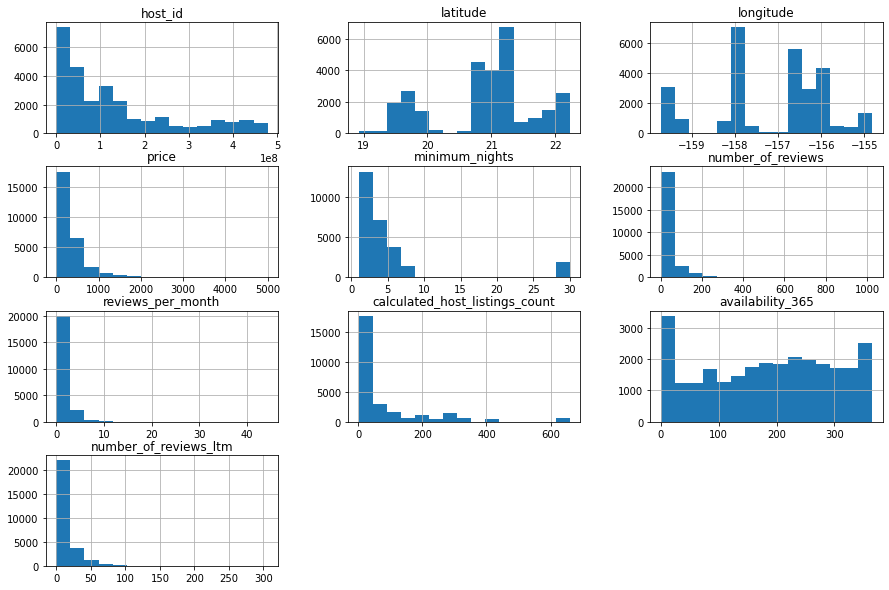

In [ ]:
#Removendo os outlies conforme a análise anterior:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 5000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#Plotando histograma para verificar os dados após outliers:
df_clean.hist(bins=15, figsize=(15,10));

In [ ]:
df_clean[['price', 'minimum_nights', 'reviews_per_month', 'number_of_reviews']].describe()

,price,minimum_nights,reviews_per_month,number_of_reviews
count,27594.000000,27594.000000,22443.000000,27594.000000
mean,389.719287,4.847902,1.291960,33.115859
std,449.398569,7.261846,1.400833,60.137325
min,0.000000,1.000000,0.010000,0.000000
25%,168.000000,1.000000,0.330000,1.000000
50%,265.000000,3.000000,0.830000,9.000000
75%,425.000000,5.000000,1.840000,37.000000
max,5000.000000,30.000000,44.350000,1025.000000


No quadro acima vemos como as médias e máximas ficam mais próximas à realidade após a eliminação dos outliers.

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
print('Média de Preços com Outlier:', df.price.mean())
print('Média de Preços sem Outlier:', df_clean.price.mean())

Média de Preços com Outlier: 476.1075577326802
Média de Preços sem Outlier: 389.7192868014786


### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
# mostrar a matriz de correlação

corr = df_clean [['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm', 'availability_365']].corr()
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,number_of_reviews_ltm,availability_365
price,1.000000,-0.082610,-0.191649,-0.222787,-0.219422,0.020146
minimum_nights,-0.082610,1.000000,-0.068041,-0.191798,-0.181256,-0.037687
number_of_reviews,-0.191649,-0.068041,1.000000,0.578846,0.766879,0.012074
reviews_per_month,-0.222787,-0.191798,0.578846,1.000000,0.816809,0.020206
number_of_reviews_ltm,-0.219422,-0.181256,0.766879,0.816809,1.000000,0.029057
availability_365,0.020146,-0.037687,0.012074,0.020206,0.029057,1.000000


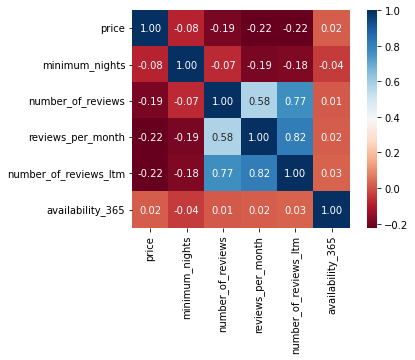

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Por ser um local muito procurado para férias há uma diferença de porcentagem de uma casa ou apartamento inteiro para outras acomodações menores. Normalmente estes tipos de lugares são frequentados por famílias e amigos, fazendo assim a procura ser maior por espaços amplos e bem localizados.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    25147
Private room        3324
Hotel room            73
Shared room           36
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]*100

Entire home/apt    87.988104
Private room       11.630511
Hotel room          0.255423
Shared room         0.125962
Name: room_type, dtype: float64

#### **neighbourhood_group o maior número de locações**

O neighbourhood_group é a localização em qual ilha a propriedade está estabelecida, aqui podemos observar em qual ilha tem a maior porcentagem de propriedades para locação. 


In [ ]:
# Avaliação do neighbourhood_group

print ('Descrição das Ilhas:', df.neighbourhood_group.unique())
print ('Porcentagem de Locação por Local:')
df.neighbourhood_group.value_counts() / df.shape[0]*100

Descrição das Ilhas: ['Hawaii' 'Maui' 'Honolulu' 'Kauai']
Porcentagem de Locação por Local:


Maui        31.987404
Honolulu    30.272918
Hawaii      23.005598
Kauai       14.734080
Name: neighbourhood_group, dtype: float64

### **Q6. Qual a localidade mais cara do Hawaii?**



Nesta seção podemos observar um pouco melhor sobre os preços das ilhas do Hawaii, podemos inclusive observar que elas tem os preços muito próximos. 

Linhas da análise:

neighbourhood_group: vemos o nome da ilha

neighbourhood: vemos o bairro e o valor médio das propriedades da mesma.

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood_group','neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood_group  neighbourhood    
Maui                 Lahaina              581.989541
Honolulu             East Honolulu        580.574074
Kauai                Koloa-Poipu          534.564103
Hawaii               South Kohala         498.538026
Honolulu             Ewa                  493.013972
                     Koolauloa            472.181172
                     Koolaupoko           458.883777
Kauai                Waimea-Kekaha        455.043478
                     Lihue                436.093190
                     North Shore Kauai    415.361786
Name: price, dtype: float64

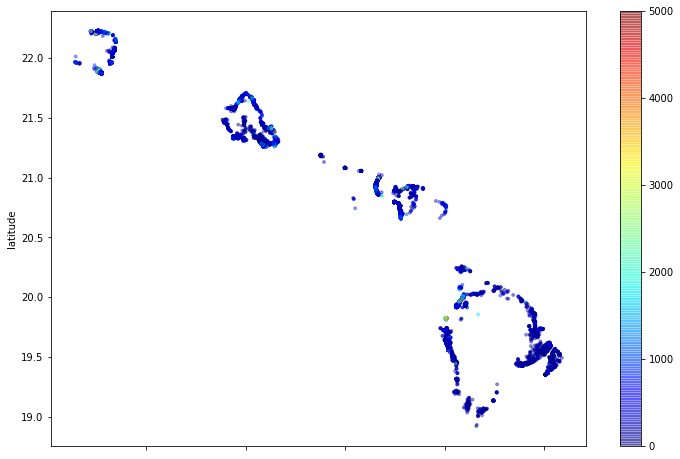

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

No mapa de calor acima fica claro a distribuição dos imóveis nas ilhas.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
print('Média de Preços com Outlier:', df.minimum_nights.mean())
print('Média de Preços sem Outlier:', df_clean.minimum_nights.mean())

Média de Preços com Outlier: 8.595311406578027
Média de Preços sem Outlier: 4.847901717764731


## Conclusões


Podemos concluir com esta análise das ilhas do hawaii que elas têm algumas características próprias, como a diferença de imóveis de acordo com o tempo de aluguel estipulado e como a maioria dos anúncios são de propriedades completas, como o local é impactado pelas temporadas de férias e a forma como os outliers interferem na média dos preços e tempo mínimo de estadia.
 
Primeiramente podemos começar com o entendimento de como funciona o mercado de locação local por meio dos preços e o mínimo de noites, após uma pesquisa e remoção dos outliers ficou claro que a maioria das pessoas buscam ficar de 1 a 7 dias, mas há um nicho representativo de interessados em passar a temporada que normalmente é de 30 dias. Após isso e ainda seguindo a linha das propriedades observamos que mais 85% dos imóveis disponíveis são inteiros, é preciso ter cuidado com este dado pois é uma característica da plataforma fazer a locação de imóveis completos ao invés de quartos de hotéis. 
 
Compreendendo isso, podemos observar que o Hawaii é um lugar atípico onde há mais de uma ilha e cada uma com a sua particularidade, temos as ilhas mais frequentadas que são Maui e Honolulu, mas o interessante é que todas as ilhas têm uma taxa bem considerável de anúncios. E quanto vamos observar quais são os preços mais altos destes locais observamos que temos preços parecidos entre todas elas, temos as ilhas mais frequentadas com os preços mais altos, provavelmente pela alta demanda, e temos as ilhas menos frequentadas possivelmente pela escassez ou exclusividade local. Quando olhamos o mapa de calor podemos observar com mais clareza como todas as ilhas têm uma alta demanda de imóveis, principalmente próximo a praia. 
 
Por ser um lugar conhecido no mundo todo e muito buscado para as férias e temporadas de surf, as ilhas do Hawaii nos demonstram dados extremamente interessantes de analisar, de como apesar de locais(ilhas) diferentes temos características de preços, imóveis e mínimo de noites parecidos. E de como o tratamento correto dos outliers pode nos demonstrar tendências de mercado e nichos, como os aluguéis mensais. 

